In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
data=pd.read_csv(r"C:\Users\vamshi krishna\Downloads\Airline+Passenger+Satisfaction\airline_passenger_satisfaction.csv")

In [2]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
data.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [8]:
#Filling the missing values with the median of the column
data['Arrival Delay'].fillna(data['Arrival Delay'].median(), inplace=True)

In [9]:
#Descriptive statistics of all the numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    print(f'\nStatistics for {col}:')
    print(f'Mean: {data[col].mean()}')
    print(f'Median: {data[col].median()}')
    print(f'Standard Deviation: {data[col].std()}')
    print(f'Skewness: {skew(data[col].dropna())}')
    print(f'Kurtosis: {kurtosis(data[col].dropna())}')


Statistics for ID:
Mean: 64940.5
Median: 64940.5
Standard Deviation: 37493.27081846377
Skewness: 0.0
Kurtosis: -1.2000000001422741

Statistics for Age:
Mean: 39.42795657530028
Median: 40.0
Standard Deviation: 15.119359950371672
Skewness: -0.0036061700966219102
Kurtosis: -0.7191587387959131

Statistics for Flight Distance:
Mean: 1190.3163920542038
Median: 844.0
Standard Deviation: 997.4524773267282
Skewness: 1.1081295077233624
Kurtosis: 0.26544648779497715

Statistics for Departure Delay:
Mean: 14.713712657838004
Median: 0.0
Standard Deviation: 38.07112621501333
Skewness: 6.821901522036001
Kurtosis: 100.64062560831256

Statistics for Arrival Delay:
Mean: 15.045465044656606
Median: 0.0
Standard Deviation: 38.416352716395906
Skewness: 6.678880008341733
Kurtosis: 95.3513881168819

Statistics for Departure and Arrival Time Convenience:
Mean: 3.0575993224514937
Median: 3.0
Standard Deviation: 1.5267414852343704
Skewness: -0.3324650231659003
Kurtosis: -1.0409023537907942

Statistics for Ease

In [10]:
#Handling Categorical labels using Label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

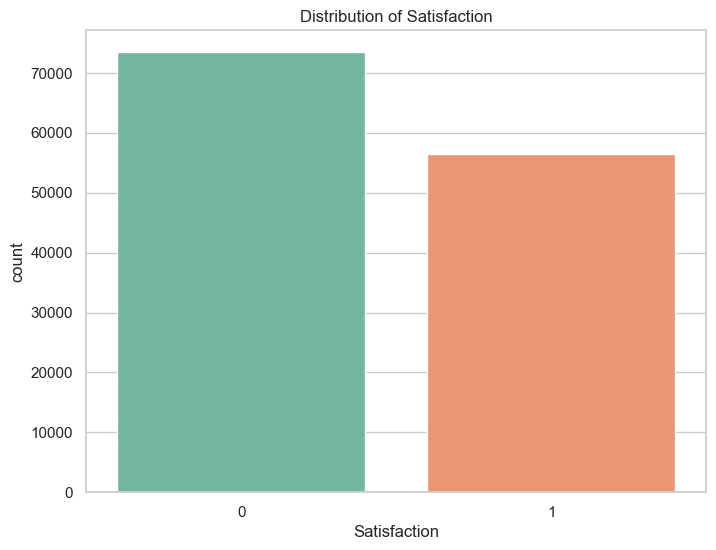

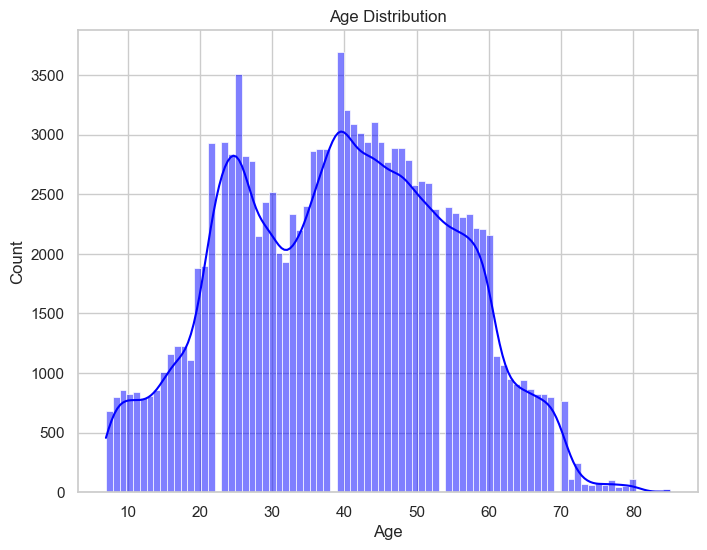

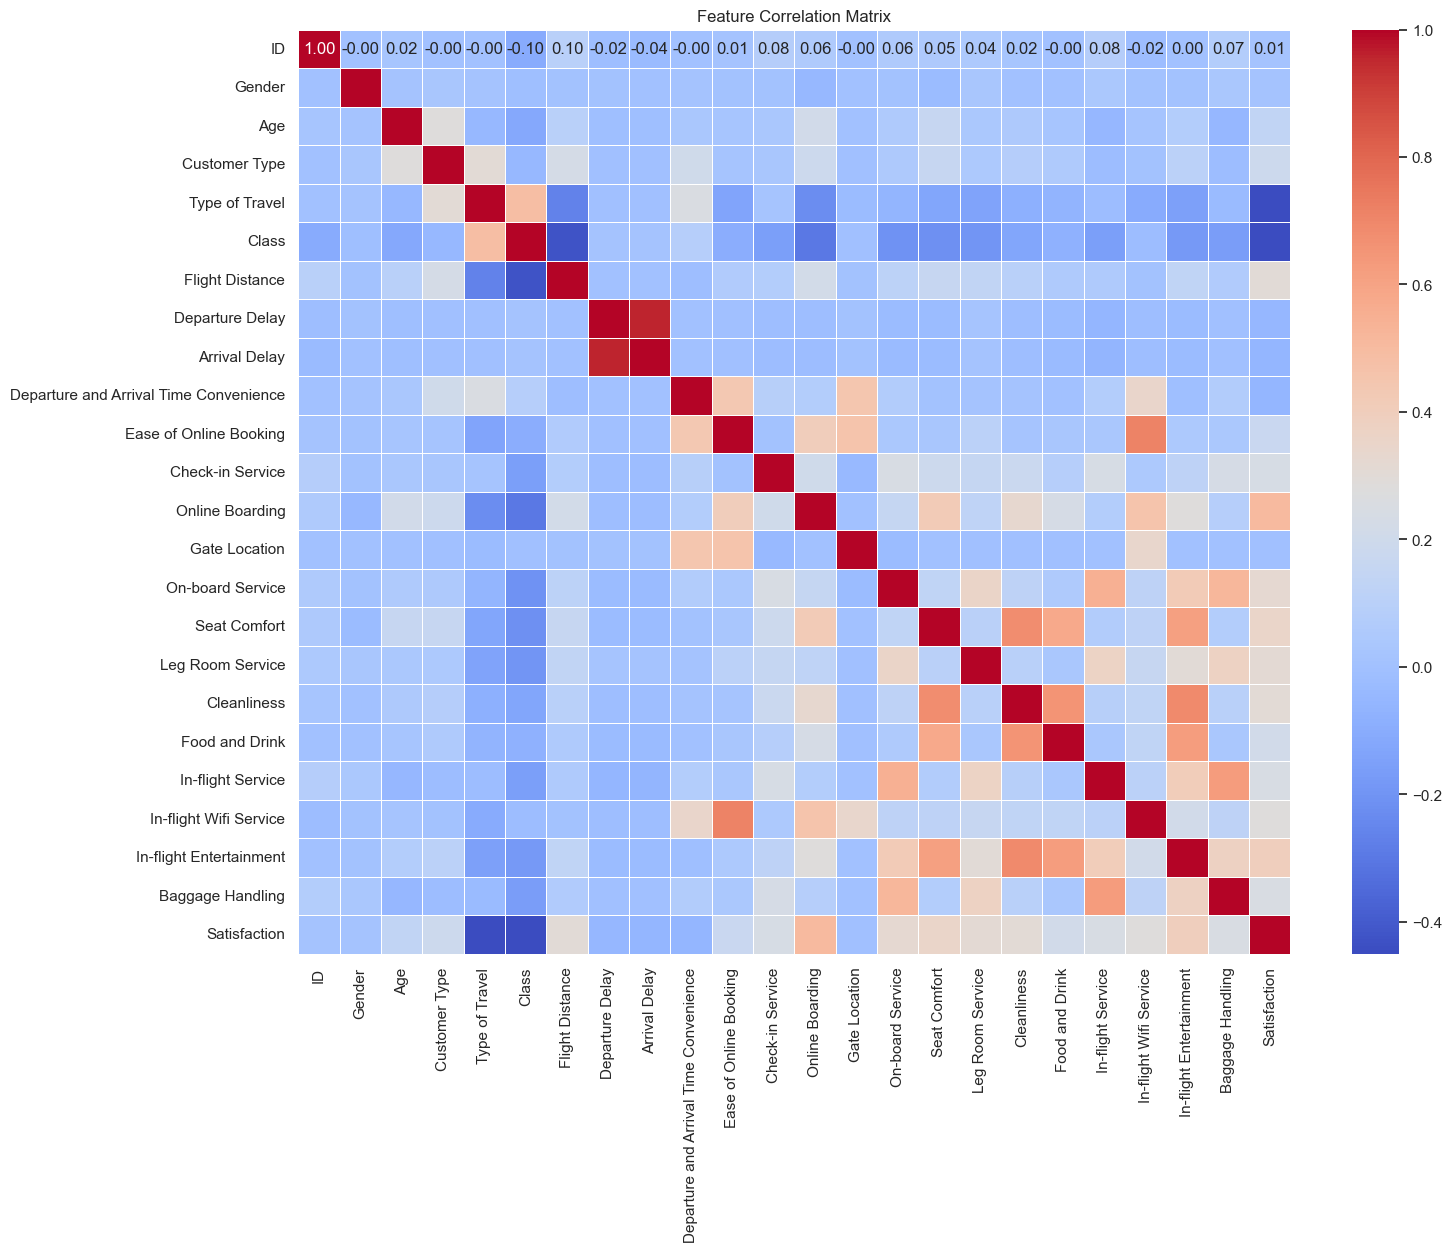

In [20]:
#Plotting to understand the trends from the data
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction', data=data, palette='Set2')
plt.title('Distribution of Satisfaction')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [13]:
#Feature engineering
X = data.drop(columns=['ID', 'Satisfaction'])
y = data['Satisfaction']

In [14]:
#Data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#Splitting the data into test,train for training the ML models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print("\n The dimension of the training dataset are: ")
print(X.shape)
print("\n The dimensions of the test dataset are: ")
print(y.shape)


 The dimension of the training dataset are: 
(129880, 22)

 The dimensions of the test dataset are: 
(129880,)


In [16]:
#Regression algorithms of multiple kinds to get the relationships between the data
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#Linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_reg = linear_reg.predict(X_test)
print("\nLinear Regression")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_reg)}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, y_pred_reg)}")
print(f"Linear Regression R^2: {r2_score(y_test,y_pred_reg)}")


Linear Regression
Linear Regression MSE: 0.11007068462554907
Linear Regression MAE: 0.2495902719308001
Linear Regression R^2: 0.5513816928174454


In [17]:
#Polynomial regression
poly = PolynomialFeatures(degree=2)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)
print("\nPolynomial Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R^2:", r2_score(y_test, y_pred_poly))


Polynomial Regression
MAE: 0.17941609985614726
MSE: 0.06216445421699346
R^2: 0.7466345166051437


In [21]:
#Ridge regression or L2 regularization
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R^2:", r2_score(y_test, y_pred_ridge))


Ridge Regression
MAE: 0.24959102585810705
MSE: 0.1100706964271607
R^2: 0.5513816447172719


In [22]:
#Lasso regression or L1 regularization
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\nLasso Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R^2:", r2_score(y_test, y_pred_lasso))


Lasso Regression
MAE: 0.365805670290085
MSE: 0.15462810075694208
R^2: 0.36977772927987007


In [23]:
#Decision tree regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\nDecision Tree Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R^2:", r2_score(y_test, y_pred_tree))


Decision Tree Regression
MAE: 0.053464736680012316
MSE: 0.053464736680012316
R^2: 0.7820922097019389


In [24]:
#Random forest regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R^2:", r2_score(y_test, y_pred_rf))


Random Forest Regression
MAE: 0.05801016322759471
MSE: 0.028019504157684012
R^2: 0.8858000877701723


In [25]:
#Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error

#Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8730212503849707
Confusion Matrix:
[[16646  1802]
 [ 2321 11701]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18448
           1       0.87      0.83      0.85     14022

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



In [26]:
#RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest Accuracy: 0.9627348321527563


In [27]:
#Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")

SVM Accuracy: 0.9554973821989529


In [28]:
#K-Nearest Neighbours
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")

KNN Accuracy: 0.9289190021558361


In [29]:
#Clustering the data into similar groups
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)
data['Cluster_KMeans'] = clusters_kmeans

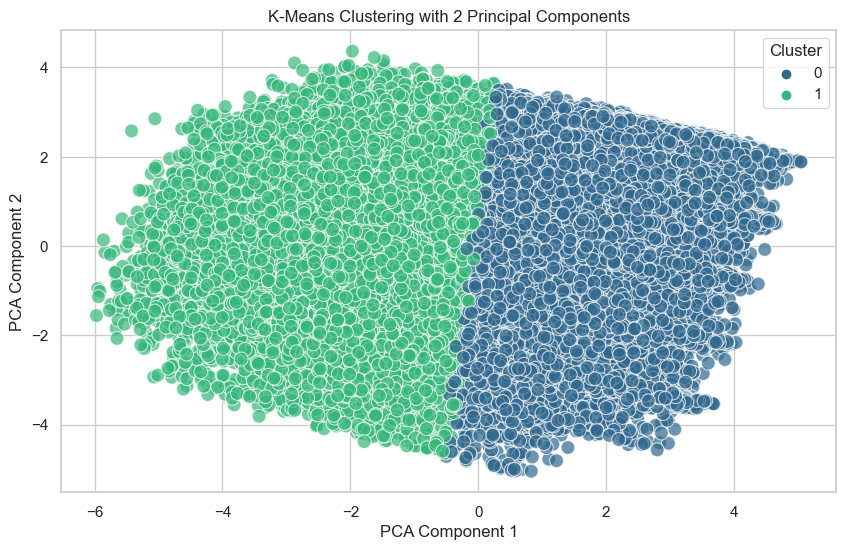

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster_KMeans'] = clusters_kmeans

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering with 2 Principal Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

Epoch 1/15
3044/3044 [==============================] - 30s 8ms/step - loss: 0.2093
Epoch 2/15
3044/3044 [==============================] - 23s 8ms/step - loss: 0.2043
Epoch 3/15
3044/3044 [==============================] - 23s 8ms/step - loss: 0.2024
Epoch 4/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.2010
Epoch 5/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1996
Epoch 6/15
3044/3044 [==============================] - 25s 8ms/step - loss: 0.1989
Epoch 7/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1984
Epoch 8/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1980
Epoch 9/15
3044/3044 [==============================] - 23s 8ms/step - loss: 0.1974
Epoch 10/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1971
Epoch 11/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1965
Epoch 12/15
3044/3044 [==============================] - 24s 8ms/step - lo

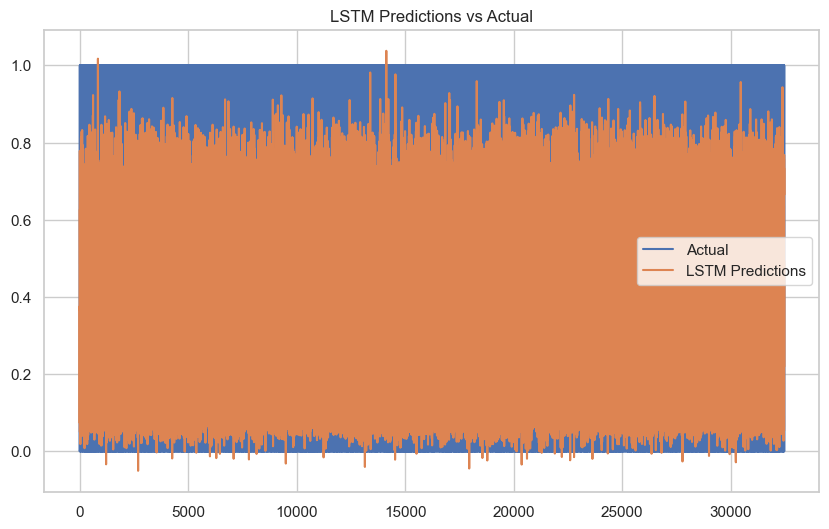

In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Scale the data in the range zero to one
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(X_scaled)

# Defining the sequence for the LSTM neural net
def create_sequences(data, target, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(target[i])
    return np.array(x), np.array(y)

# Sequence length
seq_length = 10

# Create sequences using the entire dataset
X_seq, y_seq = create_sequences(scaled_data, y, seq_length)

# Reshape X_seq for LSTM input [samples, time steps, features]
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], X_seq.shape[2]))

# Split the data into training and testing sets
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.25, random_state=42)

# LSTM neural network
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_seq, y_train_seq, epochs=15, batch_size=32)

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_seq)

# Evaluate the model
mse_lstm = mean_squared_error(y_test_seq, y_pred_lstm)
print(f'LSTM Mean Squared Error: {mse_lstm}')

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Predictions')
plt.legend()
plt.title('LSTM Predictions vs Actual')
plt.show()

Epoch 1/15
3044/3044 [==============================] - 35s 8ms/step - loss: 0.2081
Epoch 2/15
3044/3044 [==============================] - 26s 9ms/step - loss: 0.2038
Epoch 3/15
3044/3044 [==============================] - 26s 8ms/step - loss: 0.2021
Epoch 4/15
3044/3044 [==============================] - 26s 8ms/step - loss: 0.2009
Epoch 5/15
3044/3044 [==============================] - 26s 8ms/step - loss: 0.1997
Epoch 6/15
3044/3044 [==============================] - 26s 8ms/step - loss: 0.1991
Epoch 7/15
3044/3044 [==============================] - 26s 8ms/step - loss: 0.1984
Epoch 8/15
3044/3044 [==============================] - 26s 8ms/step - loss: 0.1978
Epoch 9/15
3044/3044 [==============================] - 26s 8ms/step - loss: 0.1972
Epoch 10/15
3044/3044 [==============================] - 25s 8ms/step - loss: 0.1967
Epoch 11/15
3044/3044 [==============================] - 25s 8ms/step - loss: 0.1963
Epoch 12/15
3044/3044 [==============================] - 25s 8ms/step - lo

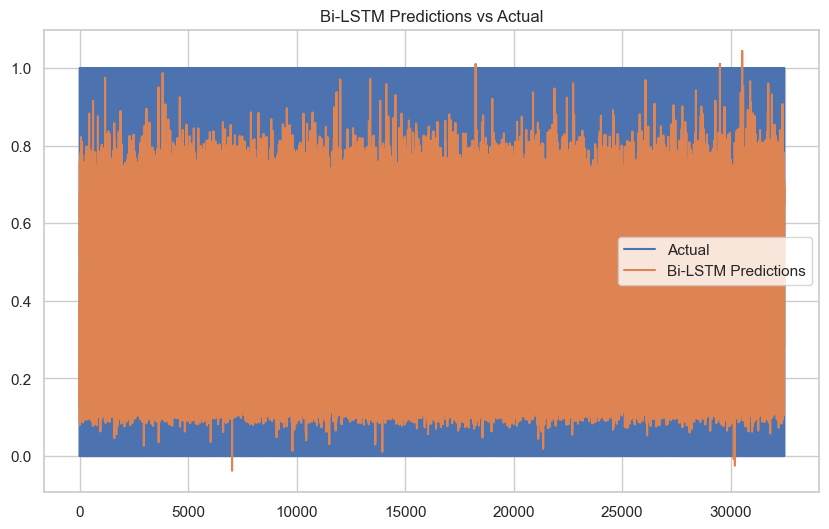

In [38]:
# Define the Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
bilstm_model.add(Bidirectional(LSTM(50, return_sequences=False)))
bilstm_model.add(Dense(25))
bilstm_model.add(Dense(1))

# Compile the model
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
bilstm_model.fit(X_train_seq, y_train_seq, epochs=15, batch_size=32)

# Make predictions
y_pred_bilstm = bilstm_model.predict(X_test_seq)

# Evaluate the model
mse_bilstm = mean_squared_error(y_test_seq, y_pred_bilstm)
print(f'Bi-LSTM Mean Squared Error: {mse_bilstm}')

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(y_pred_bilstm, label='Bi-LSTM Predictions')
plt.legend()
plt.title('Bi-LSTM Predictions vs Actual')
plt.show()

Epoch 1/15
3044/3044 [==============================] - 27s 7ms/step - loss: 0.2092
Epoch 2/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.2032
Epoch 3/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.2016
Epoch 4/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.2004
Epoch 5/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1994
Epoch 6/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1988
Epoch 7/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1981
Epoch 8/15
3044/3044 [==============================] - 25s 8ms/step - loss: 0.1973
Epoch 9/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1970
Epoch 10/15
3044/3044 [==============================] - 24s 8ms/step - loss: 0.1962
Epoch 11/15
3044/3044 [==============================] - 25s 8ms/step - loss: 0.1954
Epoch 12/15
3044/3044 [==============================] - 24s 8ms/step - lo

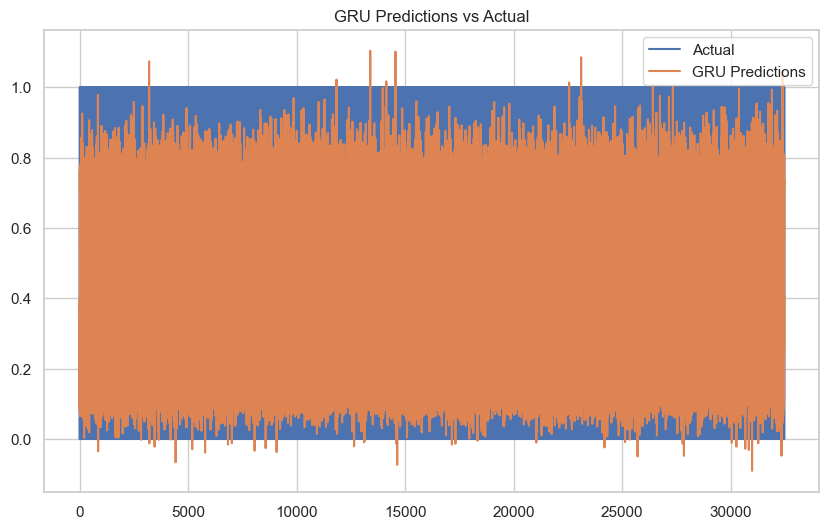

In [39]:
# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dense(25))
gru_model.add(Dense(1))

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gru_model.fit(X_train_seq, y_train_seq, epochs=15, batch_size=32)

# Make predictions
y_pred_gru = gru_model.predict(X_test_seq)

# Evaluate the model
mse_gru = mean_squared_error(y_test_seq, y_pred_gru)
print(f'GRU Mean Squared Error: {mse_gru}')

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(y_pred_gru, label='GRU Predictions')
plt.legend()
plt.title('GRU Predictions vs Actual')
plt.show()